In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from scipy.stats import pearsonr
from scipy.stats import chi2_contingency
import seaborn as sns
from IPython.display import Image
from sklearn.exceptions import DataConversionWarning
from sklearn.preprocessing import MinMaxScaler
from google.colab import drive
from scipy.stats import chi2_contingency
from sklearn.feature_selection import SelectKBest, mutual_info_regression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn.utils.validation")
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")
warnings.filterwarnings("ignore", category=FutureWarning, module='sklearn.model_selection._search')
warnings.filterwarnings("ignore", category=DataConversionWarning, module='sklearn.model_selection._search')

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Data Exploration

In [ ]:
df_test=pd.read_csv('/content/forfinaltest.csv')
df_train=pd.read_csv('/content/train.csv')

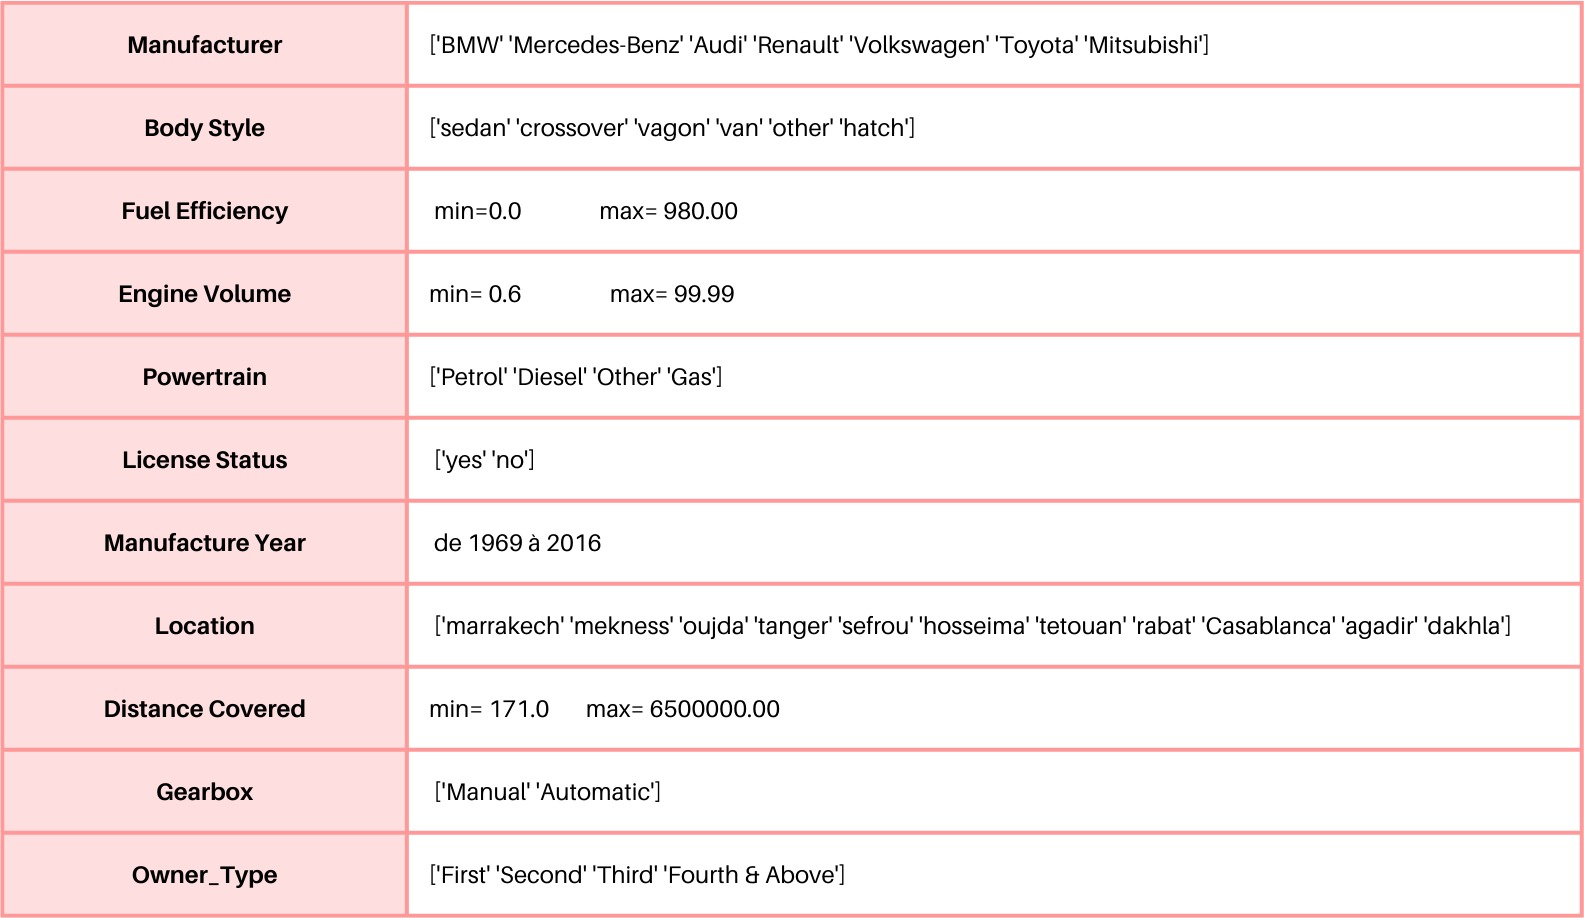

In [180]:

Image("/content/image.jpeg",width=980, height=600)


In [ ]:
df_train.isnull().sum()

Manufacturer          0
Price               128
Body Style            0
Fuel Efficiency       0
Engine Volume       109
Powertrain            0
License Status        0
Manufacture Year      0
Variant               0
Location              0
Distance Covered      0
Gearbox               0
Owner_Type            0
dtype: int64

In [ ]:
df_train.dropna(subset=['Price'], inplace=True)

In [ ]:
df_train['type']='train'
df_test['type']='test'

In [ ]:
df1 = df_train.drop('Price',axis=1)
y = df_train['Price']

In [ ]:
y_data = y.copy()

In [ ]:
df_test

,Manufacturer,Body Style,Fuel Efficiency,Engine Volume,Powertrain,License Status,Manufacture Year,Variant,Location,Distance Covered,Gearbox,Owner_Type,index,type
0,Mercedes-Benz,van,427,2.90,Diesel,yes,1999,Sprinter 212,rabat,41000,Manual,First,1,test
1,Audi,vagon,200,2.70,Diesel,yes,2006,A6,Casablanca,36000,Automatic,First,7,test
2,Renault,sedan,260,1.79,Petrol,yes,1994,19,tetouan,60000,Automatic,First,11,test
3,Toyota,crossover,21,2.00,Petrol,yes,2013,Rav 4,hosseima,77469,Manual,First,17,test
4,Mercedes-Benz,other,171,2.20,Other,no,2011,Vito,oujda,54000,Manual,Second,26,test
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1203,BMW,sedan,38,2.00,Petrol,yes,2013,320,hosseima,52400,Manual,First,4016,test
1204,Renault,vagon,237,1.90,Diesel,no,2001,Laguna,marrakech,23988,Manual,First,4017,test
1205,Renault,sedan,152,1.60,Petrol,yes,2007,Megane,hosseima,32283,Automatic,Second,4018,test
1206,BMW,sedan,1,3.50,Petrol,yes,1999,535,tanger,14149,Manual,First,4022,test


## concatenation

In [ ]:
test_ids = df_test['index'].values

In [ ]:
df = pd.concat([df1,df_test], ignore_index=True)

In [ ]:
mean_target = df['Engine Volume'].mean()
df['Engine Volume'].fillna(mean_target, inplace=True)

In [ ]:
df=df.drop('index', axis=1)

In [ ]:
df

,Manufacturer,Body Style,Fuel Efficiency,Engine Volume,Powertrain,License Status,Manufacture Year,Variant,Location,Distance Covered,Gearbox,Owner_Type,type
0,BMW,sedan,231,2.5,Petrol,yes,1990,525,marrakech,70704,Manual,First,train
1,Mercedes-Benz,sedan,317,5.0,Petrol,yes,2001,S 500,mekness,65650,Manual,First,train
2,BMW,sedan,197,3.0,Petrol,yes,2001,530,oujda,93700,Manual,First,train
3,BMW,crossover,178,4.0,Diesel,yes,2012,X5,tanger,72465,Manual,First,train
4,Audi,crossover,115,3.0,Diesel,yes,2010,Q7,sefrou,34000,Manual,First,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4116,BMW,sedan,38,2.0,Petrol,yes,2013,320,hosseima,52400,Manual,First,test
4117,Renault,vagon,237,1.9,Diesel,no,2001,Laguna,marrakech,23988,Manual,First,test
4118,Renault,sedan,152,1.6,Petrol,yes,2007,Megane,hosseima,32283,Automatic,Second,test
4119,BMW,sedan,1,3.5,Petrol,yes,1999,535,tanger,14149,Manual,First,test


In [ ]:
df.isnull().sum()

Manufacturer        0
Body Style          0
Fuel Efficiency     0
Engine Volume       0
Powertrain          0
License Status      0
Manufacture Year    0
Variant             0
Location            0
Distance Covered    0
Gearbox             0
Owner_Type          0
type                0
dtype: int64

In [ ]:
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
scaler = MinMaxScaler()
df[numeric_features] = scaler.fit_transform(df[numeric_features])

In [ ]:
y=pd.DataFrame(y)
y=scaler.fit_transform(y)
y

array([[0.00969251],
       [0.04244652],
       [0.02506684],
       ...,
       [0.10197193],
       [0.00868984],
       [0.01186497]])

### Visualisation

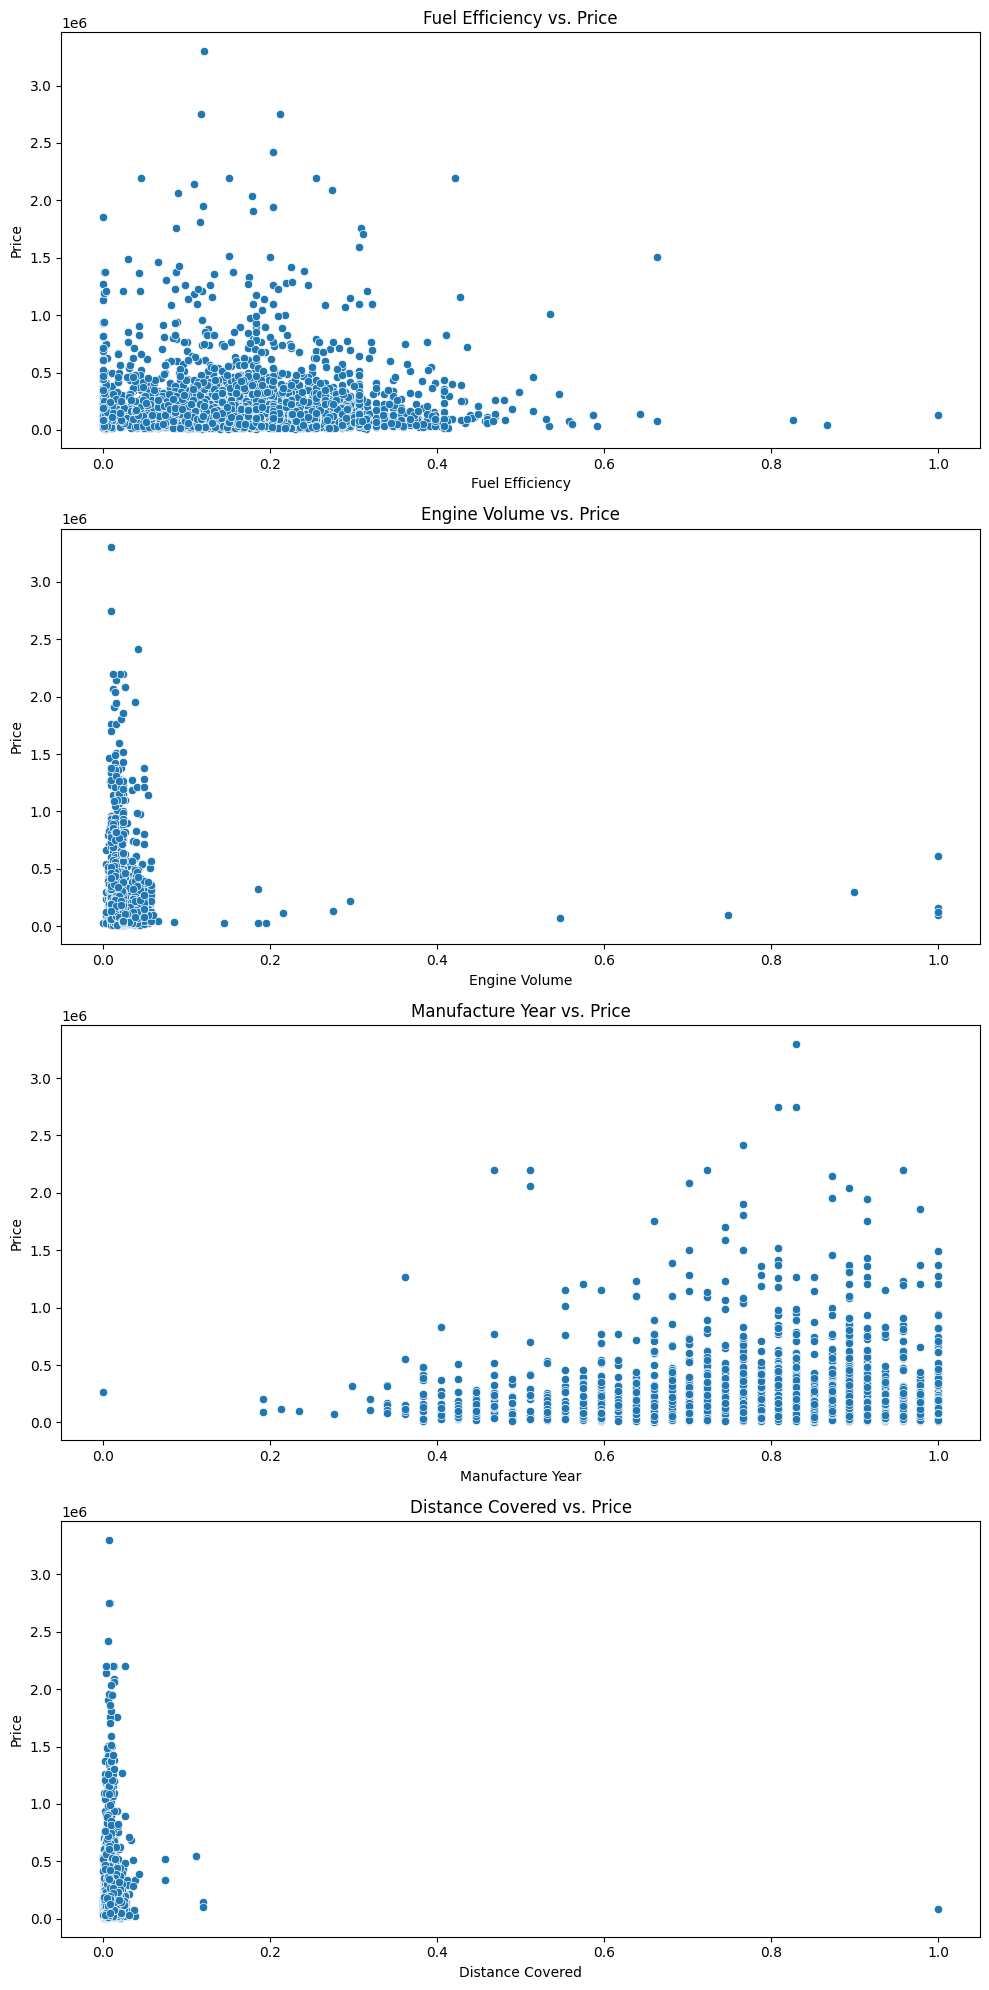

In [ ]:
numerical_columns = df.select_dtypes(include=['number']).columns
fig, axes = plt.subplots(nrows=len(numerical_columns) , ncols=1, figsize=(10, 5 * (len(numerical_columns) )))

for i, column in enumerate(numerical_columns):
        sns.scatterplot(x=df[column], y=y_data, ax=axes[i])
        axes[i].set_title(f"{column} vs. Price")

plt.tight_layout()
plt.show()


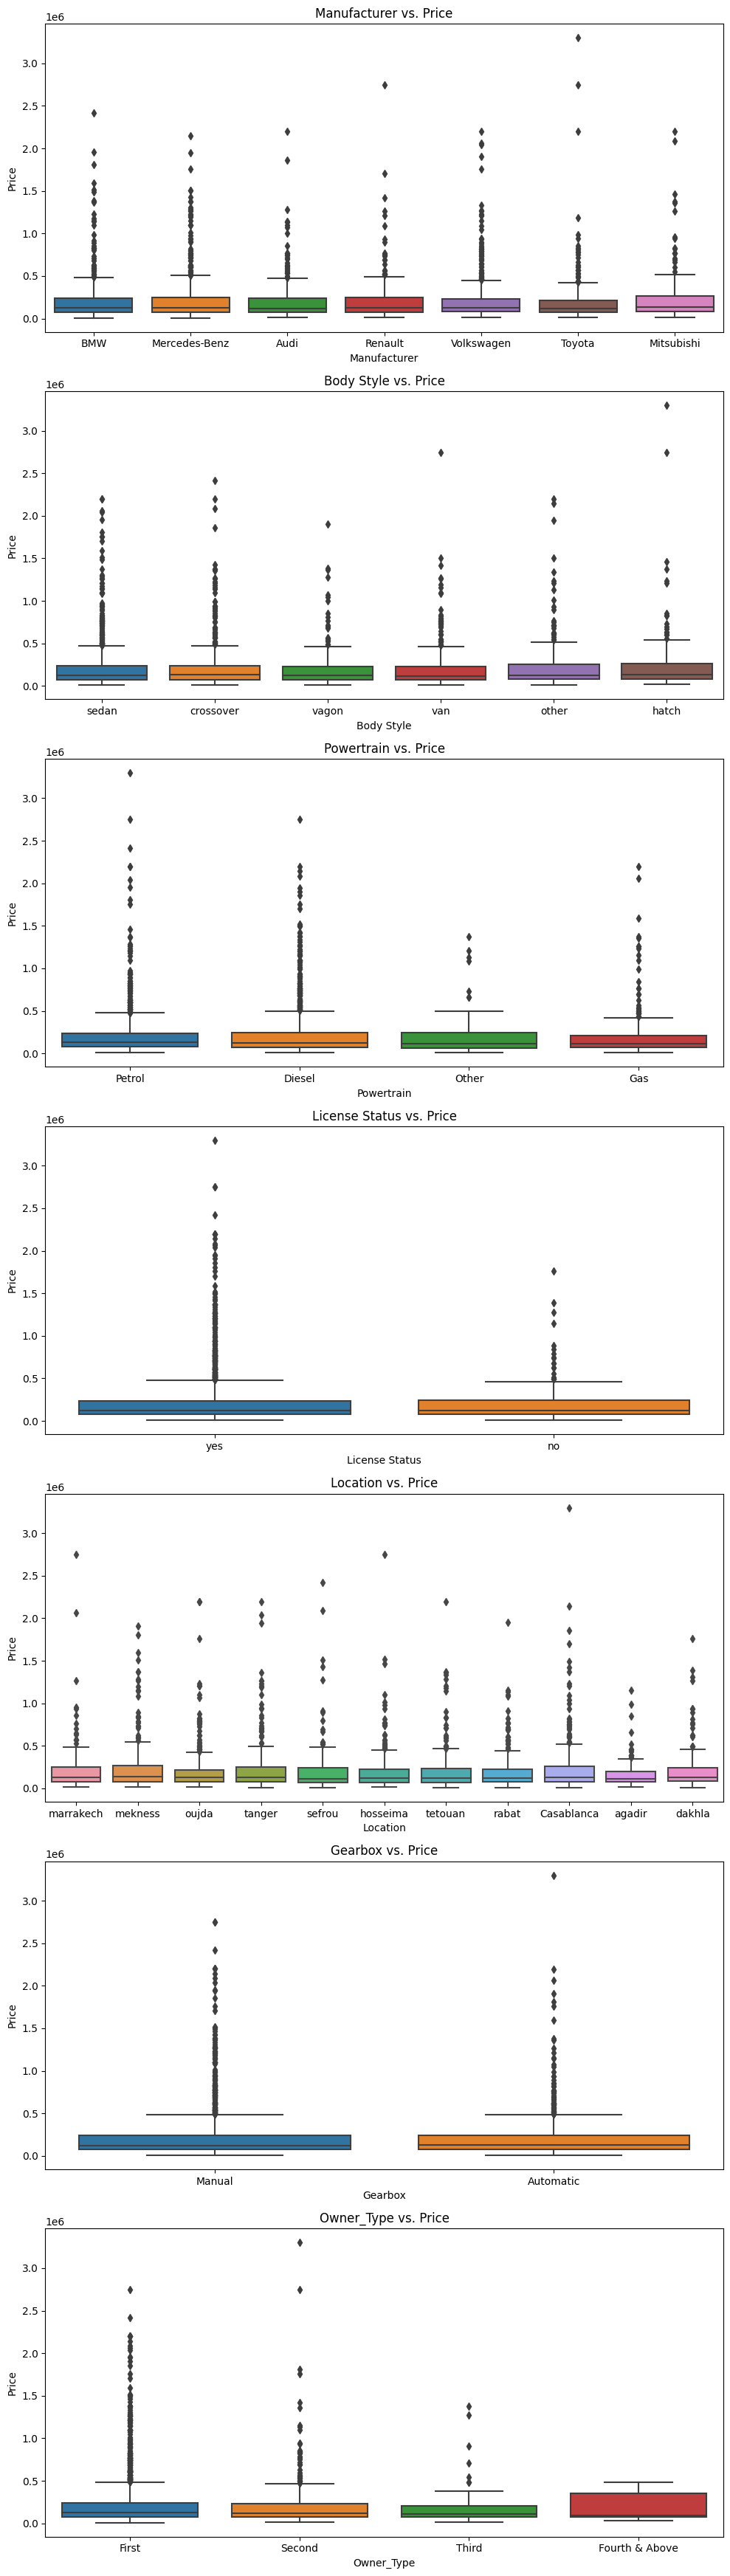

In [ ]:
categorical_columns = [col for col in df.select_dtypes(include=['object']).columns if col not in ['type', 'Variant']]

fig, axes = plt.subplots(nrows=len(categorical_columns), ncols=1, figsize=(10, 5 * len(categorical_columns)))

for i, column in enumerate(categorical_columns):
    sns.boxplot(x=df[column], y=y_data, ax=axes[i])
    axes[i].set_title(f"{column} vs. Price")

plt.tight_layout()
plt.show()

# Correlation for numeric Columns

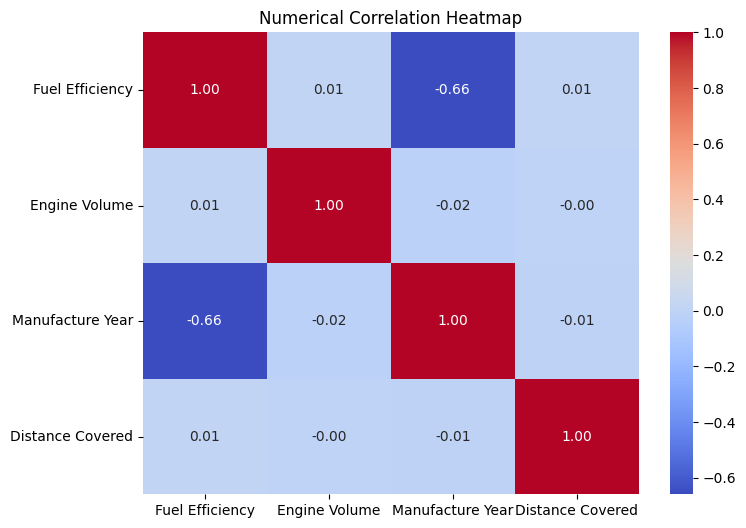

In [ ]:
numerical_cols=df.select_dtypes(include=np.number).columns.tolist()
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

numerical_correlation_matrix =df[numerical_cols].corr()
numerical_correlation_matrix
plt.figure(figsize=(8, 6))
sns.heatmap(numerical_correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Numerical Correlation Heatmap')
plt.show()


# Categorical-Categorical & Categorical-Numerical

In [ ]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2, _, _, _ = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

In [ ]:
categorical_columns = df.select_dtypes(include=['object']).columns
categorical_corr_matrix = pd.DataFrame(index=categorical_columns, columns=categorical_columns)

for col1 in categorical_columns:
    for col2 in categorical_columns:
        if col1 != col2:
            corr_value = cramers_v(df[col1], df[col2])
            categorical_corr_matrix.loc[col1, col2] = corr_value

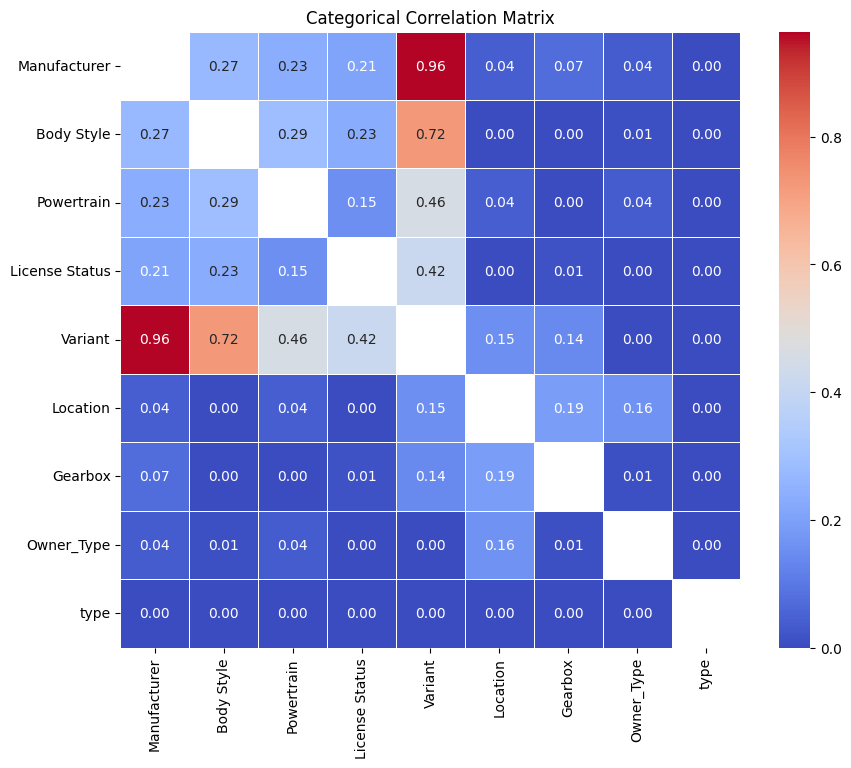

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(categorical_corr_matrix.astype(float), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Categorical Correlation Matrix")
plt.show()


In [ ]:
df=df.drop('Variant', axis=1)

In [ ]:
df=df.drop('Gearbox', axis=1)

In [ ]:
df=df.drop('Location', axis=1)

In [ ]:
df

,Manufacturer,Body Style,Fuel Efficiency,Engine Volume,Powertrain,License Status,Manufacture Year,Location,Distance Covered,Owner_Type,type
0,BMW,sedan,0.235714,0.019117,Petrol,yes,0.446809,marrakech,0.010852,First,train
1,Mercedes-Benz,sedan,0.323469,0.044270,Petrol,yes,0.680851,mekness,0.010074,First,train
2,BMW,sedan,0.201020,0.024147,Petrol,yes,0.680851,oujda,0.014389,First,train
3,BMW,crossover,0.181633,0.034209,Diesel,yes,0.914894,tanger,0.011122,First,train
4,Audi,crossover,0.117347,0.024147,Diesel,yes,0.872340,sefrou,0.005205,First,train
...,...,...,...,...,...,...,...,...,...,...,...
4116,BMW,sedan,0.038776,0.014086,Petrol,yes,0.936170,hosseima,0.008035,First,test
4117,Renault,vagon,0.241837,0.013080,Diesel,no,0.680851,marrakech,0.003664,First,test
4118,Renault,sedan,0.155102,0.010061,Petrol,yes,0.808511,hosseima,0.004940,Second,test
4119,BMW,sedan,0.001020,0.029178,Petrol,yes,0.638298,tanger,0.002151,First,test


# data separation
> Indented block



In [ ]:
df_train = df[df['type'] == 'train'].drop('type', axis=1)
df_test = df[df['type'] == 'test'].drop('type', axis=1)

df_train.reset_index(drop=True, inplace=True)
df_test.reset_index(drop=True, inplace=True)

df_test = pd.concat([df_test, pd.DataFrame({'index': test_ids})], axis=1)
categorical_cols=[i for i in categorical_cols if i in df_train.columns]

df_train= pd.get_dummies(df_train, columns=categorical_cols, drop_first=True, dtype=int)
df_test= pd.get_dummies(df_test, columns=categorical_cols, drop_first=True, dtype=int)

## Split data

In [ ]:
def select_features_regression(X, y, k=10):
    selector = SelectKBest(mutual_info_regression, k=k)
    selector.fit(X, y)
    selected_features_indices = selector.get_support(indices=True)
    selected_features = X.iloc[:, selected_features_indices]
    return selected_features

In [ ]:
X = df_train
selected_features=select_features_regression(X,y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(selected_features,y, test_size=0.2, random_state=42)

## Model

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

model = RandomForestRegressor()

param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt'],
}

random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=20, cv=5, n_jobs=-1, scoring='neg_mean_squared_error', random_state=42)
cross_val_results = cross_val_score(random_search, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
random_search.fit(X_train, y_train)
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Cross-Validation Results (Mean Squared Error):", -cross_val_results.mean())
print("Best hyperparameters:", random_search.best_params_)
print("Mean Squared Error (on full data):", mse)
print("Mean Absolute Error (on full data):", mae)
print("R2 Score (on full data):", r2)


Cross-Validation Results (Mean Squared Error): 0.001021655403463458
Best hyperparameters: {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None}
Mean Squared Error (on full data): 0.001155240030678463
Mean Absolute Error (on full data): 0.015129332145690491
R2 Score (on full data): 0.8440566789122017


In [ ]:
y_pred = best_model.predict(X_train)
mse = mean_squared_error(y_train, y_train)
mae = mean_absolute_error(y_train, y_train)
r2 = r2_score(y_train, y_pred)
print("Mean Squared Error (on full data):", mse)
print("Mean Absolute Error (on full data):", mae)
print("R2 Score (on full data):", r2)

Mean Squared Error (on full data): 0.0
Mean Absolute Error (on full data): 0.0
R2 Score (on full data): 0.9389512219511557


## Test

In [ ]:
df_test

,Fuel Efficiency,Engine Volume,Manufacture Year,Distance Covered,trustii_id,Manufacturer_BMW,Manufacturer_Mercedes-Benz,Manufacturer_Mitsubishi,Manufacturer_Renault,Manufacturer_Toyota,...,Location_marrakech,Location_mekness,Location_oujda,Location_rabat,Location_sefrou,Location_tanger,Location_tetouan,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,0.435714,0.023141,0.638298,0.006282,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0.204082,0.021129,0.787234,0.005512,7,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.265306,0.011973,0.531915,0.009205,11,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0.021429,0.014086,0.936170,0.011892,17,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0.174490,0.016098,0.893617,0.008282,26,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1203,0.038776,0.014086,0.936170,0.008035,4016,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1204,0.241837,0.013080,0.680851,0.003664,4017,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
1205,0.155102,0.010061,0.808511,0.004940,4018,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1206,0.001020,0.029178,0.638298,0.002151,4022,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
X_t=df_test[selected_features.columns]
X_t

,Fuel Efficiency,Engine Volume,Manufacture Year,Manufacturer_BMW,Manufacturer_Renault,Manufacturer_Toyota,Manufacturer_Volkswagen,Body Style_van,License Status_yes,Owner_Type_Second
0,0.435714,0.023141,0.638298,0,0,0,0,1,1,0
1,0.204082,0.021129,0.787234,0,0,0,0,0,1,0
2,0.265306,0.011973,0.531915,0,1,0,0,0,1,0
3,0.021429,0.014086,0.936170,0,0,1,0,0,1,0
4,0.174490,0.016098,0.893617,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
1203,0.038776,0.014086,0.936170,1,0,0,0,0,1,0
1204,0.241837,0.013080,0.680851,0,1,0,0,0,0,0
1205,0.155102,0.010061,0.808511,0,1,0,0,0,1,1
1206,0.001020,0.029178,0.638298,1,0,0,0,0,1,0


In [ ]:
dftest=pd.read_csv('/content/forfinaltest.csv')

In [ ]:
dftest.isnull().sum()

Manufacturer        0
Body Style          0
Fuel Efficiency     0
Engine Volume       0
Powertrain          0
License Status      0
Manufacture Year    0
Variant             0
Location            0
Distance Covered    0
Gearbox             0
Owner_Type          0
index               0
dtype: int64

In [ ]:
y_pred = best_model.predict(X_t)
y_pred_original_scale = scaler.inverse_transform(y_pred.reshape(-1, 1))
Y=pd.DataFrame(y_pred_original_scale)

In [ ]:
Y

,0
0,84970.272593
1,129278.128239
2,34676.462071
3,278503.481435
4,147725.447874
...,...
1203,357307.614225
1204,23026.992264
1205,74562.151332
1206,199034.486635


In [ ]:
test_ids_df = pd.DataFrame({'index': test_ids})
submission_df = pd.concat([test_ids_df, Y], axis=1)
submission_df.columns.values[1] = 'Price'
submission_df.to_csv('submission.csv', index=False)

In [ ]:
submission_df

,index,Price
0,1,84970.272593
1,7,129278.128239
2,11,34676.462071
3,17,278503.481435
4,26,147725.447874
...,...,...
1203,4016,357307.614225
1204,4017,23026.992264
1205,4018,74562.151332
1206,4022,199034.486635
